# Data 608: Module 4
### Aaron Grzasko
### 10/22/2017

## Overview

*This week we will be looking at Enterococcus levels in the Hudson River, using data from the organization Riverkeeper ( http://www.riverkeeper.org/).* 

*Background: Enterococcus is a fecal indicating bacteria that lives in the intestines of humans and other warm-blooded animals. Enterococcus (“ Entero”) counts are useful as a water quality indicator due to their abundance in human sewage, correlation with many human pathogens and low abundance in sewage free environments. The United States Environmental Protection Agency (EPA) reports Entero counts as colonies (or cells) per 100 ml of water.*

*Riverkeeper has based its assessment of acceptable water quality on the 2012 Federal
Recreational Water Quality Criteria from the US EPA. Unacceptable water is based on an
illness rate of 32 per 1000 swimmers.*

*The federal standard for unacceptable water quality is a single sample value of greater than
110 Enterococcus/100 mL, or five or more samples with a geometric mean (a weighted
average) greater than 30 Enterococcus/100 mL.*

## Data

*I have provided the data on our github page, in the folder
https://github.com/charleyferrari/CUNY_DATA608/tree/master/lecture4/Data. I have not
cleaned it – you need to do so.*


First, let's import relevant modules:

In [1]:
# import procedures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 

%matplotlib inline  

Now, we'll read in and examine the dataset.

In [2]:
# read in data
myUrl =  'https://raw.githubusercontent.com/charleyferrari/CUNY_DATA608/master/lecture4/Data/riverkeeper_data_2013.csv'
df =  pd.read_csv(myUrl)

# preview beginning of data set
df.head(20)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35
5,Hudson above Mohawk River,6/4/2013,238,1.2,35
6,Hudson above Mohawk River,10/15/2012,23,1.4,35
7,Hudson above Mohawk River,9/15/2012,11,0.1,35
8,Hudson above Mohawk River,8/18/2012,15,0.3,35
9,Hudson above Mohawk River,7/21/2012,6,0.2,35


In [3]:
# look at dimensions, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 5 columns):
Site                3397 non-null object
Date                3397 non-null object
EnteroCount         3397 non-null object
FourDayRainTotal    3397 non-null float64
SampleCount         3397 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.8+ KB


We notice that 'Date' is stored as a string object rather than as a date object.  Also, 'EnteroCount' is stored as string due to ">" and possibly "<" signs.  Therefore, we'll need to apply scrubbing procedures before using the data.  

In [4]:
# convert Date field to date type
df['Date'] = pd.to_datetime(df['Date'])

# remove ">" and "<" signs from EnteroCount, convert to numeric
df['EnteroCount'] = df['EnteroCount'].map(lambda x: x.lstrip('<>'))
df['EnteroCount'] = pd.to_numeric(df['EnteroCount'])

In [5]:
# check for successful data conversion
df.dtypes

Site                        object
Date                datetime64[ns]
EnteroCount                  int64
FourDayRainTotal           float64
SampleCount                  int64
dtype: object

In [6]:
# summarize numeric data columns
df.describe()

,EnteroCount,FourDayRainTotal,SampleCount
count,3397.000000,3397.000000,3397.000000
mean,387.747719,0.568001,56.886370
std,2046.114024,1.000387,41.588476
min,0.000000,0.000000,27.000000
25%,10.000000,0.000000,37.000000
50%,18.000000,0.200000,42.000000
75%,85.000000,0.700000,50.000000
max,24196.000000,8.500000,187.000000


In [7]:
# examine date field min max average
print(" min: ",df['Date'].min(), "\n","max: ",df['Date'].max())

 min:  2006-09-19 00:00:00 
 max:  2013-10-21 00:00:00


## Part 1: Lists and Graphs

*Create lists & graphs of the best and worst places to swim in the dataset*

For the purpose of this assignment, I will use mean Entero counts across all periods and for each site to determine whether a location is a good or poor place to swim. 

In [8]:
# avg Enteros count by site 
avgEnteros = df.groupby('Site')['EnteroCount'].mean().sort_values(ascending=True).reset_index()

In [9]:
# top 10 best sites: best = first
print("Top Ten Best Sites:")
avgEnteros.head(10)

Top Ten Best Sites:


,Site,EnteroCount
0,Poughkeepsie Drinking Water Intake,8.342105
1,Croton Point Beach,15.458333
2,Stony Point mid-channel,17.340909
3,Little Stony Point,17.526316
4,Poughkeepsie Launch Ramp,17.675676
5,Haverstraw Bay mid-channel,18.708333
6,TZ Bridge mid-channel,21.438596
7,Cold Spring Harbor,22.542857
8,Yonkers mid-channel,25.019231
9,Irvington Beach,28.805556


In [10]:
# top 10 worst sites: worst = first
print("Top Ten Worst Sites:")
avgEnteros.sort_values('EnteroCount', ascending=False).head(10)

Top Ten Worst Sites:


,Site,EnteroCount
74,Gowanus Canal,4206.837838
73,Newtown Creek- Metropolitan Ave. Bridge,2953.684211
72,Tarrytown Marina,2205.666667
71,Saw Mill River,1455.760000
70,Upper Sparkill Creek,1296.072727
69,Newtown Creek- Dutch Kills,1205.087719
68,Kingsland Pt. Park- Pocantico River,907.857143
67,Orangetown STP Outfall,854.192982
66,Mohawk River at Waterford,621.057143
65,Piermont Pier,482.165775


Below is a graph of average Enteros count, ordered from best to worst.

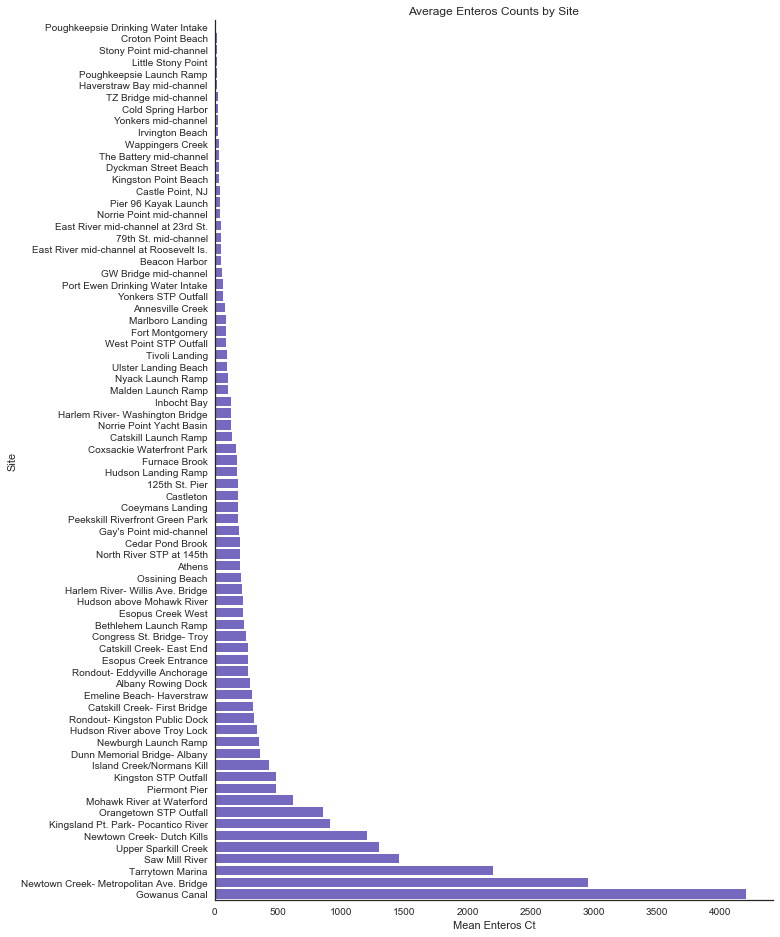

In [11]:
# horizontal bar plot of avg Enteros count, all regions
plt.figure(figsize=(10, 16.18))
sns.set_style("white")
mybar = sns.barplot(y= 'Site', x = 'EnteroCount',data=avgEnteros, color = "slateblue")
plt.title('Average Enteros Counts by Site')
plt.xlabel("Mean Enteros Ct")
sns.despine()
plt.show()

## Part 2: Testing Regularity

*The testing of water quality can be sporadic. Which sites have been tested most regularly?
Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how
regularly their water quality is tested.*

In [12]:
# calculate average lag days between tests for each site  
df = df.sort_values(['Site','Date']).reset_index()
timeLag = df.groupby('Site')['Date'].apply(lambda d: d.diff().mean().days).reset_index()
timeLag = timeLag.rename(columns={'Site': 'Site', 'Date': 'LagDays'}) # rename columns

In [13]:
# calculate shortest lags
print("Top 10 Sites with shortest average gaps between tests:")
timeLag.sort_values('LagDays').head(10)

Top 10 Sites with shortest average gaps between tests:


,Site,LagDays
70,Upper Sparkill Creek,13
57,Piermont Pier,13
52,Nyack Launch Ramp,32
0,125th St. Pier,39
61,Rondout- Eddyville Anchorage,44
65,TZ Bridge mid-channel,46
53,Orangetown STP Outfall,46
48,Newtown Creek- Metropolitan Ave. Bridge,46
47,Newtown Creek- Dutch Kills,46
39,Kingsland Pt. Park- Pocantico River,46


In [14]:
# calculate longest lags
print("Top 10 Sites with longest average gaps between tests:")
timeLag.sort_values('LagDays', ascending = False).head(10)

Top 10 Sites with longest average gaps between tests:


,Site,LagDays
66,Tarrytown Marina,73
29,Gowanus Canal,65
64,Stony Point mid-channel,60
45,Mohawk River at Waterford,58
35,Hudson above Mohawk River,58
44,Marlboro Landing,57
8,Castleton,57
38,Island Creek/Normans Kill,57
14,Cold Spring Harbor,57
4,Athens,57


Although we have a good idea about average lag times between the sites, we should also get a sense of the distribution of lag times for each site. In the scripts below, we plot a distribution of lag times for five randomly selected sites. 

In [15]:
# data frame with all date difference values per site
diff_values = df.groupby('Site')['Date'].apply(lambda d: d.diff()).reset_index()
diff_values = diff_values.merge(df,left_index=True, right_index=True)[['Date_x','Site']]

# randomly select 5 sites
sites = diff_values['Site'].unique()
np.random.seed(1942)
rand_sites = np.random.choice(sites, size = 5, replace = False)

# limit data to the 5 randomly selected sites
rand5_data = diff_values[diff_values['Site'].isin(rand_sites)]
rand5_data = rand5_data.rename(columns={'Date_x': 'TimeLag', 'Site': 'Site'})
rand5_data["TimeLag"]=rand5_data["TimeLag"].astype('timedelta64[D]') 


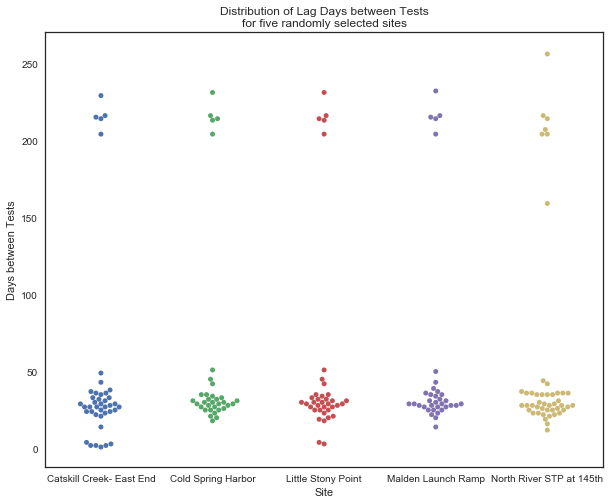

In [16]:
# plot distribution of lag times for 5 randomly selected sites
plt.figure(figsize=(10, 8))
sns.swarmplot(x="Site",y="TimeLag", data=rand5_data)
plt.ylabel("Days between Tests")
plt.title('Distribution of Lag Days between Tests\nfor five randomly selected sites')

In the plot above, we see that all five sites have roughly similar lag time distributions.  Catskill appears to be an outlier in terms of having a somewhat high number of low lag times between tests.  Also, North River appears to have more variability than the others for lag times in excess of 150 days.  

## Part 3: Rain Quantity and Water Quality

*Is there a relationship between the amount of rain and water quality? Show this
relationship graphically. If you can, estimate the effect of rain on quality at different sites and
create a visualization to compare them.*

**All Sites**

slope parameter: 296.215729617
intercept parameter: 219.496835356
r-squared value: 0.0209745665823
p-value of slope:  2.20108896001e-17


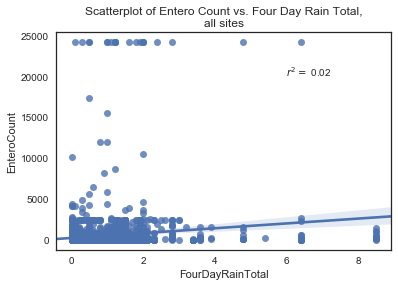

In [17]:
# perform linear regression for all sites
slope, intercept, r_value, p_value, std_err = stats.linregress(df["FourDayRainTotal"],df["EnteroCount"])
print("slope parameter: " + str(slope))
print("intercept parameter: " + str(intercept))
print("r-squared value: " + str(r_value**2))
print("p-value of slope:  " + str(p_value))

# scatterplot  and regression line
sns.regplot(x='FourDayRainTotal',y='EnteroCount',data=df, fit_reg = True)
plt.title('Scatterplot of Entero Count vs. Four Day Rain Total,\nall sites')
plt.text(6, 20000, r'$r^2 =$ %s' %round(r_value**2,2))

We can see that the OLS line above does not fit well to the full data.  We also note the very low accompanying $r^2$ value. 

**Randomly Selected Sites**

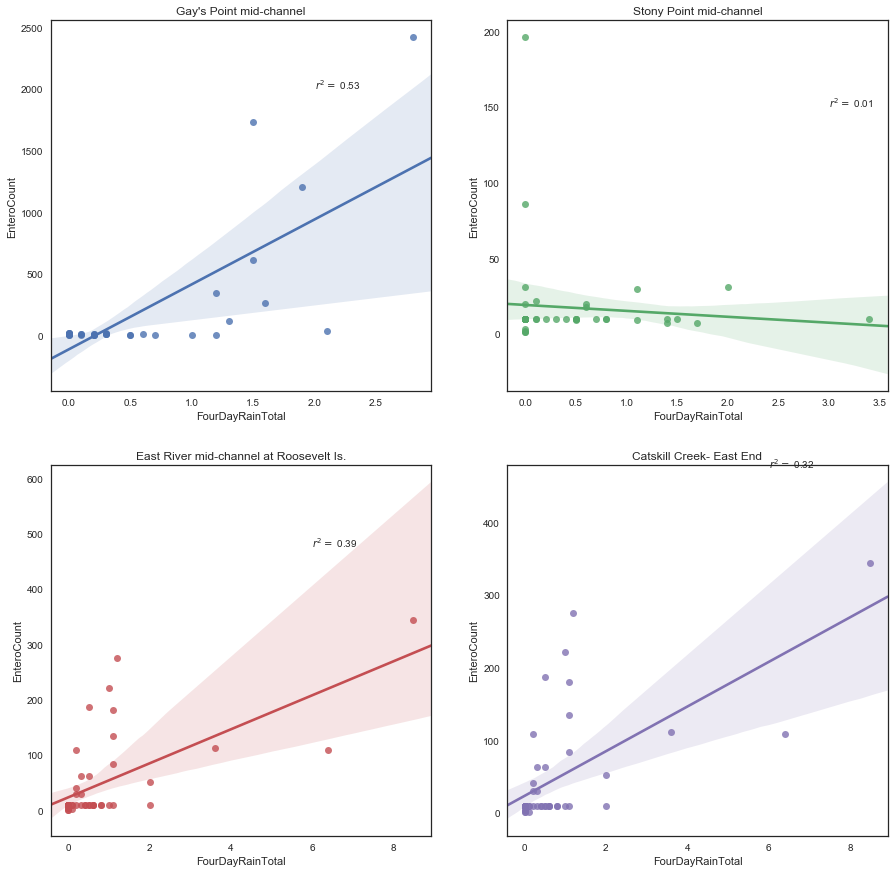

In [18]:
# plot scatterplots and regressions for 4 randomly selected sites.
np.random.seed(4567)
rand_sites = np.random.choice(sites, size = 4, replace = False)

df1 = df[df['Site']==rand_sites[0]]
df2 = df[df['Site']==rand_sites[1]]
df3 = df[df['Site']==rand_sites[2]]
df4 = df[df['Site']==rand_sites[3]]

fig = plt.figure(figsize=(15,15 ))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# plot 1
sns.regplot(x='FourDayRainTotal',y='EnteroCount',data=df1, fit_reg = True, ax=ax1)
ax1.set_title(rand_sites[0])
r_value = stats.linregress(df1["FourDayRainTotal"],df1["EnteroCount"])[2]
ax1.text(2, 2000, r'$r^2 =$ %s' %round(r_value**2,2))

# plot 2
sns.regplot(x='FourDayRainTotal',y='EnteroCount',data=df2, fit_reg = True, ax=ax2)
ax2.set_title(rand_sites[1])
r_value = stats.linregress(df2["FourDayRainTotal"],df2["EnteroCount"])[2]
ax2.text(3,150,r'$r^2 =$ %s' %round(r_value**2,2))

# plot 3
sns.regplot(x='FourDayRainTotal',y='EnteroCount',data=df3, fit_reg = True, ax=ax3)
ax3.set_title(rand_sites[2])
r_value = stats.linregress(df3["FourDayRainTotal"],df3["EnteroCount"])[2]
ax3.text(6, 475, r'$r^2 =$ %s' %round(r_value**2,2))

# plot 4
sns.regplot(x='FourDayRainTotal',y='EnteroCount',data=df3, fit_reg = True, ax=ax4)
ax4.set_title(rand_sites[3])
r_value = stats.linregress(df4["FourDayRainTotal"],df4["EnteroCount"])[2]
ax4.text(6, 475, r'$r^2 =$ %s' %round(r_value**2,2))

plt.show()

None of the four randomly selected sights have an OLS line that fits tightly to the data.  We see that Gary's Point has a moderate $r^2$ value of 0.53; however, the underlying relationship appears to be somewhat curvilinear.

## References

- Remove unwanted strings:
https://stackoverflow.com/questions/13682044/pandas-dataframe-remove-unwanted-parts-from-strings-in-a-column
    
- Seaborn overview: https://seaborn.pydata.org/
- Mean time differences over rows in df: https://stackoverflow.com/questions/39272470/average-time-difference-in-pandas
- How to convert time difference to days only: https://stackoverflow.com/questions/25646200/python-convert-timedelta-to-int-in-a-dataframe
- Renaming columns in df: https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
- Filtering pandas df: https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
- Subplots with seaborn: https://stackoverflow.com/questions/33925494/seaborn-produces-separate-figures-in-subplots